<a href="https://colab.research.google.com/github/anopsy/MyFala/blob/main/firstrun_wave_baseline_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



I mount my google drive, where I store data



In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
import os

base_dir = '/content/gdrive/MyDrive/waves'

print("Contents of base directory:")
print(os.listdir(base_dir))

print("\nContents of train directory:")
print(os.listdir(f'{base_dir}/train'))

print("\nContents of validation directory:")
print(os.listdir(f'{base_dir}/validation'))

Contents of base directory:
['train', 'validation']

Contents of train directory:
['good_waves', 'bad_waves']

Contents of validation directory:
['good_waves', 'bad_waves']


Creating directories for later use

In [3]:
import os

train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

# Directory with training good_waves/bad_waves pictures
train_gw_dir = os.path.join(train_dir, 'good_waves')
train_bw_dir = os.path.join(train_dir, 'bad_waves')

# Directory with validation good_waves/bad_waves pictures
validation_gw_dir = os.path.join(validation_dir, 'good_waves')
validation_bw_dir = os.path.join(validation_dir, 'bad_waves')

Checking on file names and number of images

In [4]:
train_gw_fnames = os.listdir( train_gw_dir )
train_bw_fnames = os.listdir( train_bw_dir )

print(train_gw_fnames[:10])
print(train_bw_fnames[:10])

['goodwave579.jpg', 'goodwave586.jpg', 'goodwave581.jpg', 'goodwave582.jpg', 'goodwave583.jpg', 'goodwave584.jpg', 'goodwave585.jpg', 'goodwave592.jpg', 'goodwave588.jpg', 'goodwave587.jpg']
['badwave607.jpg', 'badwave613.jpg', 'badwave610.jpg', 'badwave612.jpg', 'badwave609.jpg', 'badwave611.jpg', 'badwave618.jpg', 'badwave616.jpg', 'badwave614.jpg', 'badwave615.jpg']


In [5]:
print('total training good waves images :', len(os.listdir(      train_gw_dir ) ))
print('total training bad waves images :', len(os.listdir(      train_bw_dir ) ))

print('total validation good waves images :', len(os.listdir( validation_gw_dir ) ))
print('total validation bad waves images :', len(os.listdir( validation_bw_dir ) ))

total training good waves images : 701
total training bad waves images : 702
total validation good waves images : 349
total validation bad waves images : 349


Plotting examples of images in each directory

In [6]:
%matplotlib inline

import matplotlib.image as mpimg
import matplotlib.pyplot as plt

# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 4
ncols = 4

pic_index = 0 # Index for iterating over images

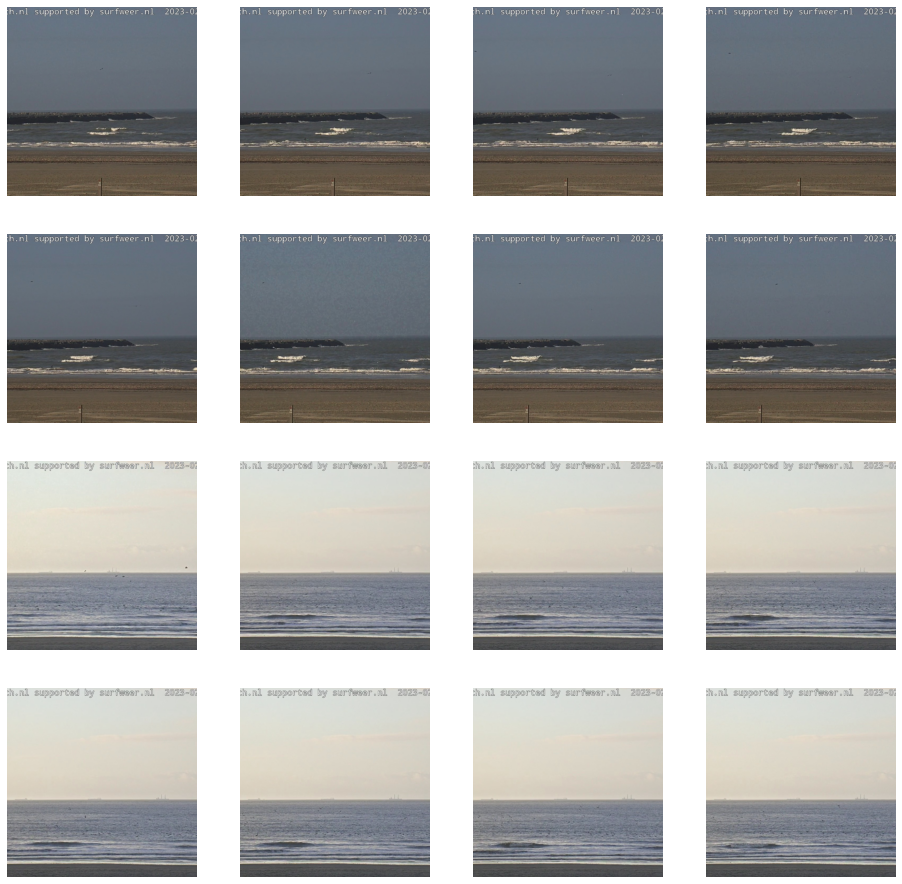

In [7]:
# Set up matplotlib fig, and size it to fit 4x4 pics
fig = plt.gcf()
fig.set_size_inches(ncols*4, nrows*4)

pic_index+=8

next_gw_pix = [os.path.join(train_gw_dir, fname) 
                for fname in train_gw_fnames[ pic_index-8:pic_index] 
               ]

next_bw_pix = [os.path.join(train_bw_dir, fname) 
                for fname in train_bw_fnames[ pic_index-8:pic_index]
               ]

for i, img_path in enumerate(next_gw_pix+next_bw_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()


Simple baseline model

In [8]:
import tensorflow as tf

model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 150x150 with 3 bytes color
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2), 
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'), 
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(), 
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'), 
    # Only 1 output neuron. It will contain a value from 0-1 where 0 for 1 class ('cats') and 1 for the other ('dogs')
    tf.keras.layers.Dense(1, activation='sigmoid')  
])

Displaying model characteristics

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 64)       0

Choosing the optimisation method and metrics

In [10]:
from tensorflow.keras.optimizers import RMSprop

model.compile(optimizer=RMSprop(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics = ['accuracy'])

Data preprocessing

In [11]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255.
train_datagen = ImageDataGenerator( rescale = 1.0/255. )
test_datagen  = ImageDataGenerator( rescale = 1.0/255. )

# --------------------
# Flow training images in batches of 20 using train_datagen generator
# --------------------
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    batch_size=20,
                                                    class_mode='binary',
                                                    target_size=(150, 150))     
# --------------------
# Flow validation images in batches of 20 using test_datagen generator
# --------------------
validation_generator =  test_datagen.flow_from_directory(validation_dir,
                                                         batch_size=20,
                                                         class_mode  = 'binary',
                                                         target_size = (150, 150))

Found 1403 images belonging to 2 classes.
Found 698 images belonging to 2 classes.


Training model for 15 epochs

In [12]:
history = model.fit(
            train_generator,
            epochs=15,
            validation_data=validation_generator,
            verbose=2
            )

Epoch 1/15
71/71 - 276s - loss: 0.6843 - accuracy: 0.6037 - val_loss: 0.6384 - val_accuracy: 0.5115 - 276s/epoch - 4s/step
Epoch 2/15
71/71 - 79s - loss: 0.5018 - accuracy: 0.7634 - val_loss: 0.4192 - val_accuracy: 0.6648 - 79s/epoch - 1s/step
Epoch 3/15
71/71 - 72s - loss: 0.4035 - accuracy: 0.8239 - val_loss: 0.5250 - val_accuracy: 0.6404 - 72s/epoch - 1s/step
Epoch 4/15
71/71 - 78s - loss: 0.2951 - accuracy: 0.8689 - val_loss: 0.3185 - val_accuracy: 0.9384 - 78s/epoch - 1s/step
Epoch 5/15
71/71 - 72s - loss: 0.2623 - accuracy: 0.8795 - val_loss: 0.1333 - val_accuracy: 0.9771 - 72s/epoch - 1s/step
Epoch 6/15
71/71 - 80s - loss: 0.2414 - accuracy: 0.8924 - val_loss: 0.3307 - val_accuracy: 0.8653 - 80s/epoch - 1s/step
Epoch 7/15
71/71 - 80s - loss: 0.1742 - accuracy: 0.9294 - val_loss: 0.2949 - val_accuracy: 0.9155 - 80s/epoch - 1s/step
Epoch 8/15
71/71 - 81s - loss: 0.1610 - accuracy: 0.9323 - val_loss: 0.2969 - val_accuracy: 0.8926 - 81s/epoch - 1s/step
Epoch 9/15
71/71 - 78s - loss:

Upload an image and let the model ppredict if it's a good wave or a bad wave

In [15]:

import numpy as np

from google.colab import files
from tensorflow.keras.utils import load_img, img_to_array

uploaded=files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path='/content/' + fn
  img=load_img(path, target_size=(150, 150))
  
  x=img_to_array(img)
  x /= 255
  x=np.expand_dims(x, axis=0)
  images = np.vstack([x])
  
  classes = model.predict(images, batch_size=10)
  
  print(classes[0])
  
  if classes[0]>0.5:
    print(fn + " is a good wave")
  else:
    print(fn + " is a bad_wave")

Saving badwave666.jpg to badwave666.jpg
Saving badwave2137.jpg to badwave2137.jpg
Saving badwave3333.jpg to badwave3333.jpg
Saving badwave6969.jpg to badwave6969.jpg
Saving badwave9009.jpg to badwave9009.jpg
Saving badwave9023.jpg to badwave9023.jpg
1/1 [==============================] - 0s 45ms/step
[0.26054418]
badwave666.jpg is a bad_wave
1/1 [==============================] - 0s 36ms/step
[0.9987826]
badwave2137.jpg is a good wave
1/1 [==============================] - 0s 35ms/step
[0.9997871]
badwave3333.jpg is a good wave
1/1 [==============================] - 0s 39ms/step
[0.9134449]
badwave6969.jpg is a good wave
1/1 [==============================] - 0s 36ms/step
[0.86395407]
badwave9009.jpg is a good wave
1/1 [==============================] - 0s 45ms/step
[0.86254716]
badwave9023.jpg is a good wave


Showing training stats

Text(0.5, 1.0, 'Training and validation loss')

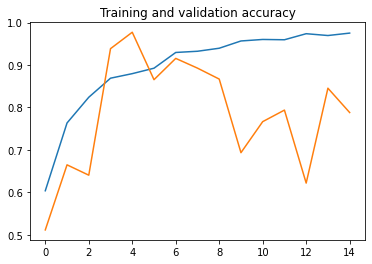

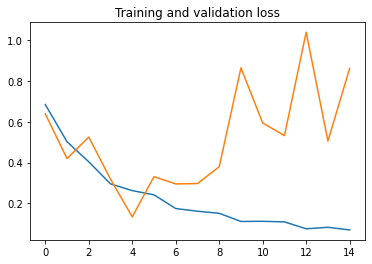

In [16]:
#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc      = history.history[     'accuracy' ]
val_acc  = history.history[ 'val_accuracy' ]
loss     = history.history[    'loss' ]
val_loss = history.history['val_loss' ]

epochs   = range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot  ( epochs,     acc )
plt.plot  ( epochs, val_acc )
plt.title ('Training and validation accuracy')
plt.figure()

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot  ( epochs,     loss )
plt.plot  ( epochs, val_loss )
plt.title ('Training and validation loss'   )

Clean up

In [ ]:
import os, signal

os.kill(os.getpid(), signal.SIGKILL)